# Using Neural Networks to classify signals in 8 categories  

## The purpose of this notebook is to show how to use Neural networks to classify physical - signals, it can be used to detect signal presenting anomalies.

# Subject: 


## 8 databases of signals will be created, in 8 categories. A NN will be use to classify any new signal in the good category regarding the training.
The databes are declined in 4 supposed nominal signals and 4 supposed anomaly signals, it is to give a clue on how to use this kind of application to detect anomaly detection**

 # The notebook is presented as followed: 
 
* Creation of a main fonction to create all of the signals
* Tuto to export the function to csv format
* Tuto to import back the function from csv format
* Librairies import
* Creation of 8 databases of signals with 4 considered as normal signals and 4 as anomaly
* Display of one signal of every category
* Labelisation of the signals
* Data reshaping for NN compatibility
* Neural Network / model creation with keras
* Visualisation of this NN architecture and its training + parameter choices
* Application on an example
* Application of the trained NN on new signal to see if it classified it into the good category
* Conlusion

As i am begining with Kaggle notebooks, any recommandations, questions, comments, limits highlights and upvote will be very welcome!




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv


# Creation of a main fonction to create all of the signals

In [2]:
file_name = "Example1.csv"
DataInput = []
IndexMax = 10000
f = lambda x: 3*np.sin(3*x/IndexMax*2*np.pi)

for i in range(IndexMax) :
    DataInput.append(f(i))

# Export the function to csv format

In [3]:
# Export of the fonction in a folder 
out_file = open(file_name, 'w', newline='')
wrt = csv.writer(out_file)
wrt.writerow(DataInput)
out_file.close()


#  Import back the function from csv format

In [4]:

# Re-importation of the fonction and draw of it
in_file = open(file_name, 'r')
reader = list(csv.reader(in_file, quoting=csv.QUOTE_NONNUMERIC))
DataInput = reader[0]
in_file.close()

# Plot of the function 

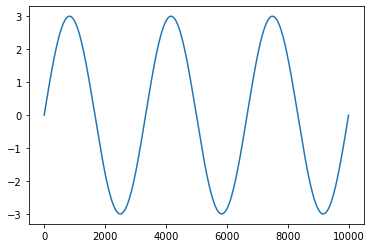

In [5]:
plt.plot(DataInput)
plt.show()

# Librairies import

In [6]:
# LSTM pour une variable simple
from numpy import array
import math
import random
import matplotlib.pyplot as plt
import csv
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense

# Creation of databases that will be usefull later in the programme

In [7]:
n_steps = 1 # number of neurones for the NN
n_features = 1 # reshape value 

file_name = "Example1.csv"

Data_output=np.zeros([10000,1]) # Initialisation of databases for further using
BDDtrain=np.zeros([2000,10000])
BDDytarget=np.zeros([2000,8])



# Creation of 8 databases of signals with 4 considered as normal signals and 4 as anomaly

1. The 4 nominal/ normal signals : 

In [8]:
#BDD des differents cas nominaux :

for i in range(250):               #Loop for the first 1000 nominal cases - category 1
    for j in range (10000):
        BDDtrain[i,j] = DataInput[j] + random.random()

for i in range(250):               #Loop for the  1000 nominal cases - category 2
    for j in range (10000):
        BDDtrain[i + 250 ,j] = 1.25 * DataInput[j] + random.random()

for i in range(250):               #Loop for the  1000 nominal cases - category 3
    for j in range (10000):
        BDDtrain[i + 500 ,j] = 2 * DataInput[j] + random.random()

for i in range(250):               #Loop for the  1000 nominal cases - category 4
    for j in range (10000):
        BDDtrain[i + 750 ,j] =  DataInput[j]


2. The 4 Anomaly categories

In [9]:
##BDD d'anomalies :
for i in range(250):               #Loop for the  1000 Anomaly cases - category 1
    for j in range (10000):
        BDDtrain[i + 1000, j] =   DataInput[j] + (random.random()*10)

for i in range(250):               #Loop for the  1000 Anomaly cases - category 2
    for j in range (10000):
        BDDtrain[i + 1250, j] =   math.cos(j/500)

for i in range(250):               #Loop for the  1000 Anomaly cases - category 3
    for j in range (10000):
        BDDtrain[i + 1500, j] =   (DataInput[j]/10) + random.random()

for i in range(250):               #Loop for the  1000 Anomaly cases - category 4
    for j in range (10000):
        if j <= 2500:
            BDDtrain[i + 1750, j] = 0
        else:
            BDDtrain[i + 1750, j] = DataInput[j] + random.random()


Creation of a fonction to reshape the databases

In [10]:
# Transform inputs in under-series of n_steps size
def shape_data(sequence):

    X, y = list(), list()                                         # create into new list
    seq_x = sequence[0:len(sequence)]
    X.append(seq_x)                         #append x and y during the process
    #for i in range (len(sequence)):
    seq_y = 0
    y.append(seq_y)
    seq_y =1
    y.append(seq_y)

    return array(X), array(y)   # return the new shape inputs

# Display of one signal of every category

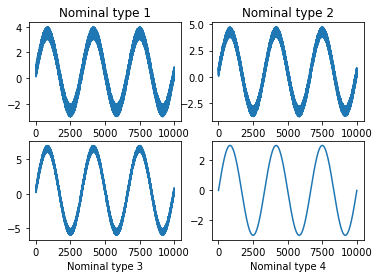

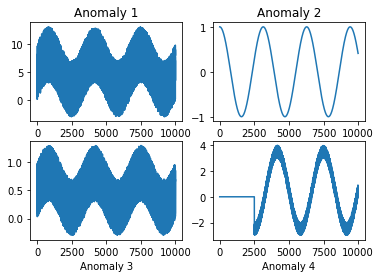

In [11]:
#Display of the 4 kinds of nominal types and the 4 types of anomaly 4.


plt.subplot(2, 2, 1)
plt.title('Nominal type 1');
plt.plot(BDDtrain[200,:])

#plt.show()
plt.subplot(2, 2, 2)
plt.title('Nominal type 2');
plt.plot(BDDtrain[400,:])
#plt.show()
plt.subplot(2, 2, 3)
plt.xlabel('Nominal type 3');
plt.plot(BDDtrain[600,:])
#plt.show()
plt.subplot(2, 2, 4)
plt.xlabel('Nominal type 4');
plt.plot(BDDtrain[800,:])
plt.show()




#display of the 4 anomalies
plt.subplot(2, 2, 1)
plt.title('Anomaly 1');
plt.plot(BDDtrain[1200,:])

#plt.show()
plt.subplot(2, 2, 2)
plt.title('Anomaly 2');
plt.plot(BDDtrain[1400,:])
#plt.show()
plt.subplot(2, 2, 3)
plt.xlabel('Anomaly 3');
plt.plot(BDDtrain[1600,:])
#plt.show()
plt.subplot(2, 2, 4)
plt.xlabel('Anomaly 4');
plt.plot(BDDtrain[1800,:])
plt.show()

# labelisation of the signals

the label is coded in a 8 values vector, a 1 is set on the good category and 0 for all other values.

In [12]:
# labelisation of the signals in 8 categories
for i in range (2000):
    if i < 250:
        BDDytarget[i, 0] = 1
    if  250 <=  i  < 500:
        BDDytarget[i, 1] = 1
    if  500 <=  i  < 750:
        BDDytarget[i, 2] = 1
    if  750 <=  i  < 1000:
        BDDytarget[i, 3] = 1
    if  1000 <=  i  < 1250:
        BDDytarget[i, 4] = 1
    if  1250 <=  i  < 1500:
        BDDytarget[i, 5] = 1
    if  1500 <=  i  < 1750:
        BDDytarget[i, 6] = 1
    if  1750 <=  i  < 2000:
        BDDytarget[i, 7] = 1


# Data reshaping for NN compatibility

In [13]:
X, y = shape_data(DataInput)   # call of the reshape function defined before

In [14]:
#reshape the database to give it a NN compatible shape

X = BDDtrain.reshape((2000, 10000, n_features)) #reshape pour avoir un format d'entrée de NN
y = y.reshape(1,2)

# Neural Network / model creation with keras

In [15]:
# creation of the model and its structure
model = Sequential()

model.add(Dense(5, activation='relu',input_shape=(10000, 1)))       
model.add(Dense(3))
model.add(Dense(3))
model.add(Flatten())
model.add(Dense(8,activation = "softmax"))




# Visualisation of this NN architecture and its training + parameter choices

This function is used to show the parameters and architecture of the NN model you create

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10000, 5)          10        
_________________________________________________________________
dense_1 (Dense)              (None, 10000, 3)          18        
_________________________________________________________________
dense_2 (Dense)              (None, 10000, 3)          12        
_________________________________________________________________
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 240008    
Total params: 240,048
Trainable params: 240,048
Non-trainable params: 0
_________________________________________________________________


In [17]:
#optimisation parameters
model.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'])    

In [18]:
model.fit(X, BDDytarget, epochs=10, verbose=1)      

Epoch 1/10
63/63 [==============================] - 2s 37ms/step - loss: 0.6627 - accuracy: 0.5870
Epoch 2/10
63/63 [==============================] - 2s 37ms/step - loss: 0.5304 - accuracy: 0.7500
Epoch 3/10
63/63 [==============================] - 2s 39ms/step - loss: 0.5298 - accuracy: 0.7500
Epoch 4/10
63/63 [==============================] - 2s 37ms/step - loss: 0.5247 - accuracy: 0.7500
Epoch 5/10
63/63 [==============================] - 2s 37ms/step - loss: 0.5202 - accuracy: 0.7500
Epoch 6/10
63/63 [==============================] - 2s 37ms/step - loss: 0.5199 - accuracy: 0.7500
Epoch 7/10
63/63 [==============================] - 2s 36ms/step - loss: 0.5197 - accuracy: 0.7500
Epoch 8/10
63/63 [==============================] - 2s 37ms/step - loss: 0.5197 - accuracy: 0.7500
Epoch 9/10
63/63 [==============================] - 3s 40ms/step - loss: 0.5197 - accuracy: 0.7500
Epoch 10/10
63/63 [==============================] - 2s 38ms/step - loss: 0.5196 - accuracy: 0.7500


# Application on an example

In [19]:
#Application of the trained NN

listtemp =np.zeros([10000,1])


#Reshape before prediction
x_input = listtemp.reshape((1, 10000, n_features))     #reshape pour entrée en NN


#Prediction of the kind(anomaly or no)
prediction = model.predict(x_input, verbose=0)
score = prediction[0,1]
score

0.009669911

# Application of the trained NN on new signal to see if it classified it into the good category

1/1 [==============================] - 0s 2ms/step
[[2.63847973e-28 0.00000000e+00 9.97206032e-01 1.72885810e-03
  1.28673163e-20 0.00000000e+00 2.00318323e-06 1.06301601e-03]
 [2.72786551e-28 0.00000000e+00 9.97235477e-01 1.66568474e-03
  1.10559789e-20 0.00000000e+00 2.23819097e-06 1.09661219e-03]
 [2.85901628e-28 0.00000000e+00 9.97044504e-01 1.90652022e-03
  1.11676200e-20 0.00000000e+00 2.19045296e-06 1.04684499e-03]
 [2.53408686e-28 0.00000000e+00 9.97671664e-01 1.53351261e-03
  1.04340078e-20 0.00000000e+00 1.93553865e-06 7.92951963e-04]
 [2.52515488e-28 0.00000000e+00 9.97524679e-01 1.67023751e-03
  9.97332068e-21 0.00000000e+00 2.04419121e-06 8.03090225e-04]
 [2.69228491e-28 0.00000000e+00 9.97327685e-01 1.62479968e-03
  1.21258716e-20 0.00000000e+00 2.13035264e-06 1.04530854e-03]
 [2.84249252e-28 0.00000000e+00 9.97183502e-01 1.72098237e-03
  1.21562592e-20 0.00000000e+00 2.23865914e-06 1.09328888e-03]
 [2.82802710e-28 0.00000000e+00 9.96782422e-01 2.09224271e-03
  1.04148905

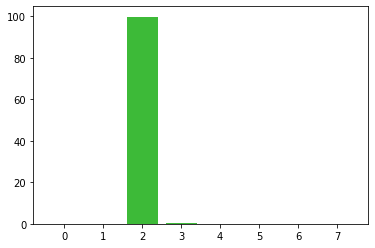

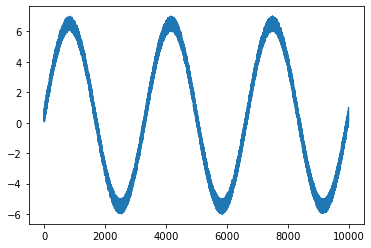

In [20]:
#UTilisation of a test database

BDDtest=np.zeros([10,10000])            # 10 for the number of signal we test
                                        
predictiontest = np.zeros([1000,2])
for i in range(10):               #loop to create one kind of signal
    for j in range (10000):
        BDDtest[i,j] =  2 * DataInput[j] + random.random()
        



BDDtest = BDDtest.reshape((10, 10000, n_features))     #reshape to get to the NN

#Test and visualisation of the results
predictiontest= model.predict(BDDtest, verbose=1)
print(predictiontest)

#Hist plot and visualisation of the tested signal
plt.bar(range(8), 100*predictiontest[1], color="#3DBA38")
plt.show()
plt.plot(BDDtest[1,:])
plt.show()


# Conclusion

## The NN is able to classify the signal in the good category; of course the accuracy can be optimised but it is not the subject of this notebook. 
## It is possible to change the kind of signal we want to test ( line 6 in the last cell) to test of the algorithm is able to classify any kind of signal in the good category

## This approach could allow you to classify signals, times series into categories or to use it to detect anormal times series - Anomaly detection